In [1]:
import sys
# sys.path.append(r"Y:\Users\Yingyue\Gates_Lab_Suite-master")
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
import os
from SPAM import *
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid
sys.path.append(r"/Users/yzhu/yzhu_work/gates projects/EAB")
from EAB_CB_data_analysis import *

In [2]:
import json, pickle
import qiskit
#transpiler reducinig qiskit circuit to QASM strings
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
from qiskit import IBMQ, QuantumCircuit, execute
# from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Pauli, Clifford, Statevector,Operator
from qiskit.visualization import array_to_latex
from scipy.stats import sem, unitary_group
from scipy.linalg import sqrtm,expm
import qiskit.quantum_info as qi
from qiskit.quantum_info import Pauli
import pylatexenc

/var/folders/6l/f5pw0tyx785dhvmqpb7282h00000gn/T/ipykernel_11766/1375469573.py:9: DeprecationWarning: The qiskit.extensions module is deprecated since Qiskit 0.46.0. It will be removed in the Qiskit 1.0 release.
  from qiskit.extensions import UnitaryGate


In [3]:
def read_circuit_file(pathfilename):
    """
    store circuits in list circuit_list
    """
    circuit_list=[]
    file=open(pathfilename, 'r')
    Lines= file.readlines()
    # c_d2=[]
    count = 0
    for line in Lines:
        circuit_list.append(line)
        count += 1
    # print (count)
    # count=0
    return circuit_list,count

def read_data_file(pathname):
    # paf_data_d2="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=2/"
    L1=[]
    filenames=[]
    filenames_ordered=[]
    line_Idx="000"
    line_num=""
    p=0 #position indicator

    #------------------------------------------read in raw data-------------------------------
    for f in os.listdir(pathname):
        if (f.find("Line")!=-1):
            n=f.find("_")
            line_Idx=f[n+6:n+9]
            for i in range(3):
                if line_Idx[i]=="0":
                    p+=1
                else:
                    line_num=line_Idx[p:3]
                    p=0
                    break
            L1.append(int(line_num))
            filenames.append(f)
        else:
            print (f) #print out non datafiles just for debugging 
            continue
    for Idx in range (len(filenames)):
        for i in range (len(filenames)):
            if L1[i]==Idx+1:
                filenames_ordered.append(filenames[i])
                break
    return filenames_ordered
    

In [5]:
# c_d2,circuit_count= read_circuit_file("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=2.txt")
# print (circuit_count)
c_d2,circuit_count= read_circuit_file("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/0919 ancilla twirl FTXX45_01+10_R mapping45213/d=2.txt")
print (circuit_count)
# c_d8,circuit_count= read_circuit_file("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/01 10/XX23541_noSE_explicitCNOT_FT_R0627_01+10/XX/d=8.txt")
# print (circuit_count)

# c_d16,circuit_count= read_circuit_file("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/to run-0916 II ancilla err meas/d=16.txt")
# print (circuit_count)

# c_d32,circuit_count= read_circuit_file("/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/to run-0916 II ancilla err meas/d=32.txt")
# print (circuit_count)


20
20


In [11]:
# paf_data_d2="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240919/2024-09-19 0305FTXX45__d=2/"
paf_data_d2_0927="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240927/2024-09-27 test__d=2/"
paf_data_d2_0919="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240927/2024-09-27 test__d=2/"
# paf_data_d8="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240917/2024-09-17 EAB_FTXX23__d=8_no_anc_twril/"
# paf_data_d2_qubitsplitting="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240919/2024-09-19 OldTest__d=2/"

# paf_data_d2_old="/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/FTXX45middleionidle_03052024_45213/2024-03-05 EAB__d=2/"
# paf_data_d8_global_alignment2="/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240917/2024-09-17 d=8/"
# filenames_d2=read_data_file(paf_data_d2)
# filenames_d2_qubitsplitting=read_data_file(paf_data_d2_qubitsplitting)
# filenames_d8_global_alignment2=read_data_file(paf_data_d8_global_alignment2)
# filenames_d2_old=read_data_file(paf_data_d2_old)
filenames_d2_0927=read_data_file(paf_data_d2_0927)
# filenames_d16=read_data_file(paf_data_d16)
# filenames_d32=read_data_file(paf_data_d32)

print (filenames_d2)
print (filenames_d2_old)


qubit splitting no RBR
.DS_Store
['2024-09-19-133314_Line_001.txt', '2024-09-19-133339_Line_002.txt', '2024-09-19-133405_Line_003.txt', '2024-09-19-133430_Line_004.txt', '2024-09-19-133455_Line_005.txt']
['2024-03-05-174130_Line_001.txt', '2024-03-05-174155_Line_002.txt', '2024-03-05-174221_Line_003.txt', '2024-03-05-174246_Line_004.txt', '2024-03-05-174311_Line_005.txt', '2024-03-05-174434_Line_006.txt', '2024-03-05-174459_Line_007.txt', '2024-03-05-174525_Line_008.txt', '2024-03-05-174550_Line_009.txt', '2024-03-05-174616_Line_010.txt', '2024-03-05-174738_Line_011.txt', '2024-03-05-174803_Line_012.txt', '2024-03-05-174829_Line_013.txt', '2024-03-05-174854_Line_014.txt', '2024-03-05-174919_Line_015.txt', '2024-03-05-175042_Line_016.txt', '2024-03-05-175108_Line_017.txt', '2024-03-05-175134_Line_018.txt', '2024-03-05-175159_Line_019.txt', '2024-03-05-175225_Line_020.txt']


In [12]:
Set_Mapping([4,5,2,1,3])
nqubit=2
C=20

a=Quantum_State(5)
b=Quantum_State(5)
c=Quantum_State(5)
d=Quantum_State(5)
a_s=Quantum_State(5)
b_c=Quantum_Circuit(5,"qc")

spam1=SPAM_Operator(5)
spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0516 FTXX 13452/spam/spam.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0424/SPAM1/SPAM1.csv")


2024-09-19-133314_Line_001.txt
2024-03-05-174130_Line_001.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



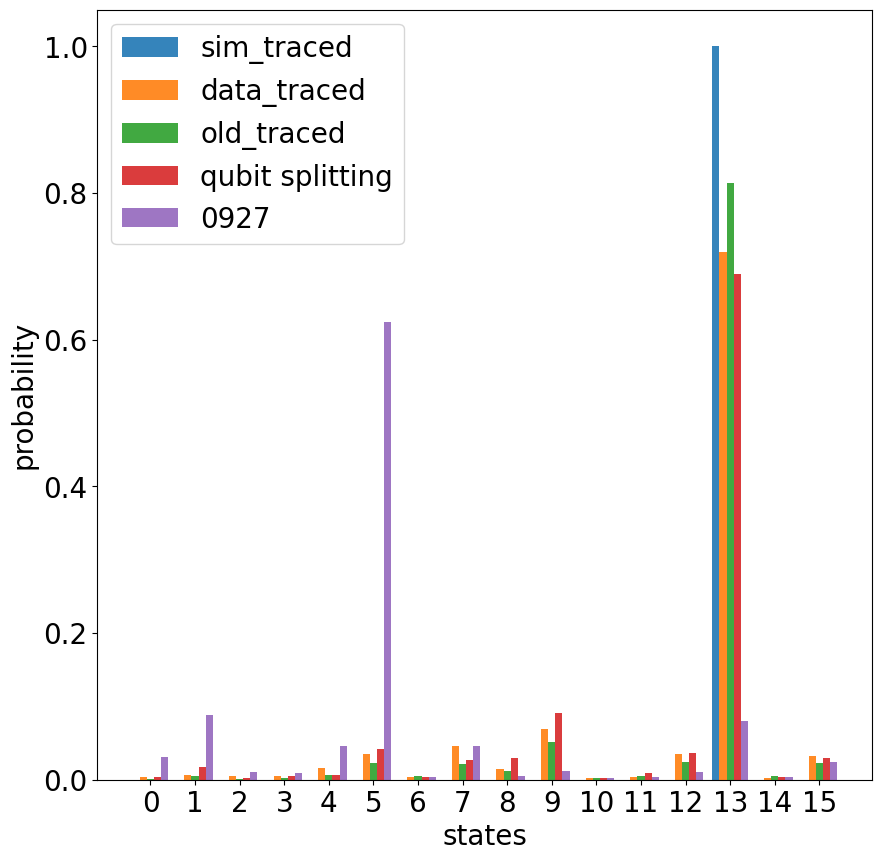

2024-09-19-133339_Line_002.txt
2024-03-05-174155_Line_002.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RY+41:FTXA450.2500+:AZ5+1.0000:FTXA450.2500+:RY+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



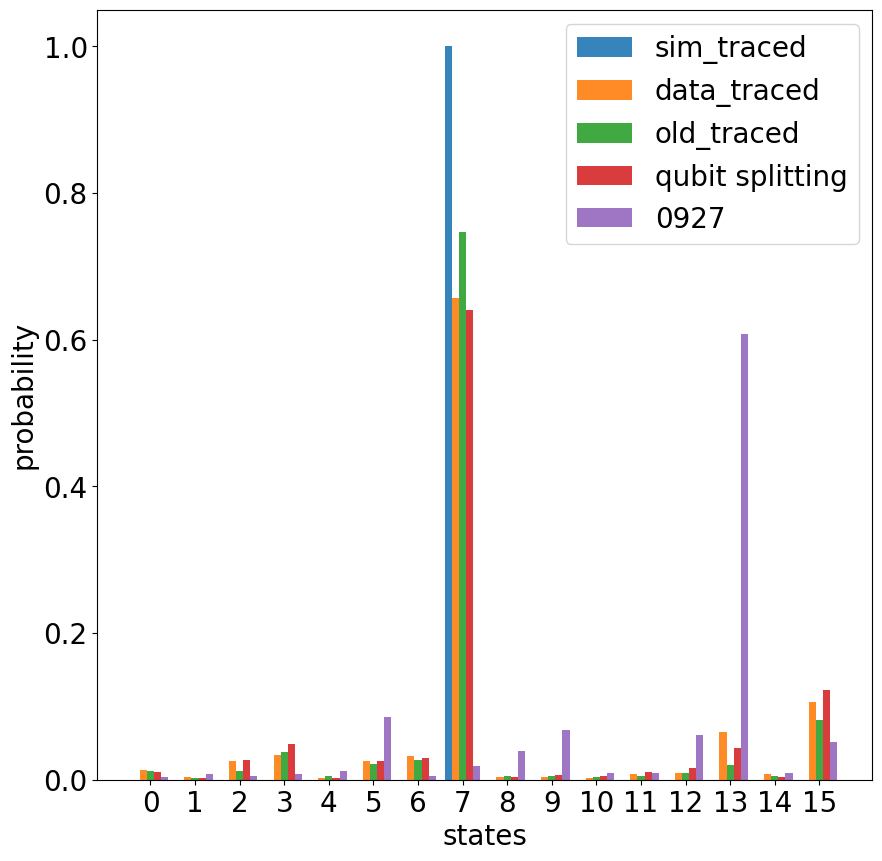

2024-09-19-133405_Line_003.txt
2024-03-05-174221_Line_003.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:RY+51:FTXA450.2500+:RY+41:RX+51:FTXA450.2500+:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



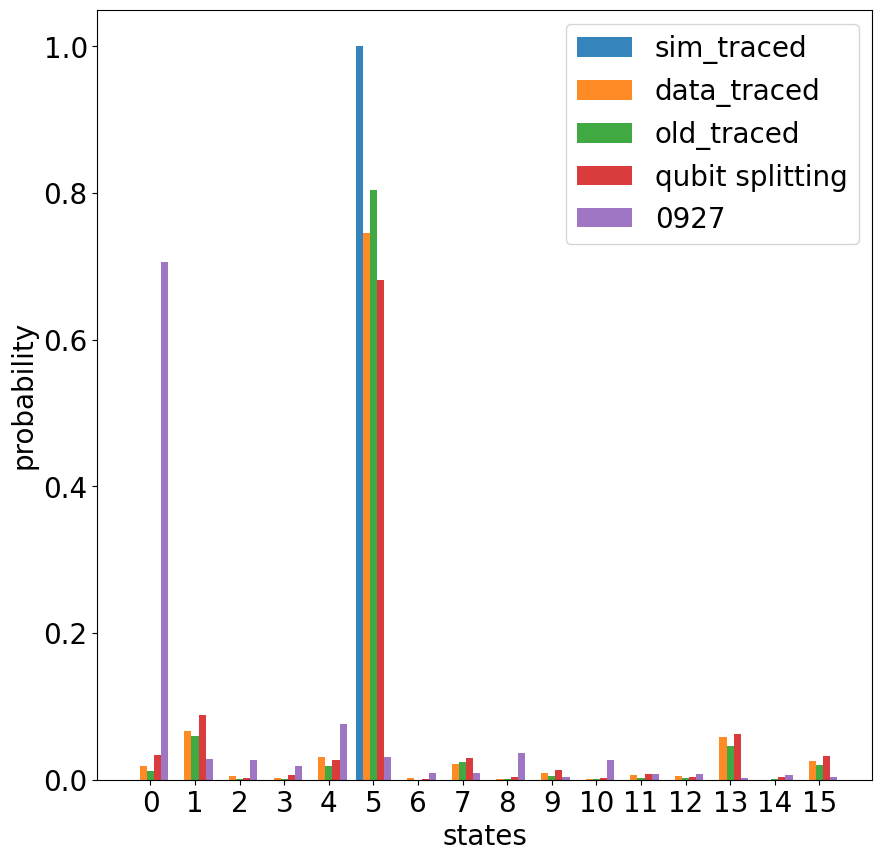

2024-09-19-133430_Line_004.txt
2024-03-05-174246_Line_004.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:RX+41:RY+51:FTXA450.2500+:RX+41:AZ5+1.0000:FTXA450.2500+:AZ4+1.0000:RX+51:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



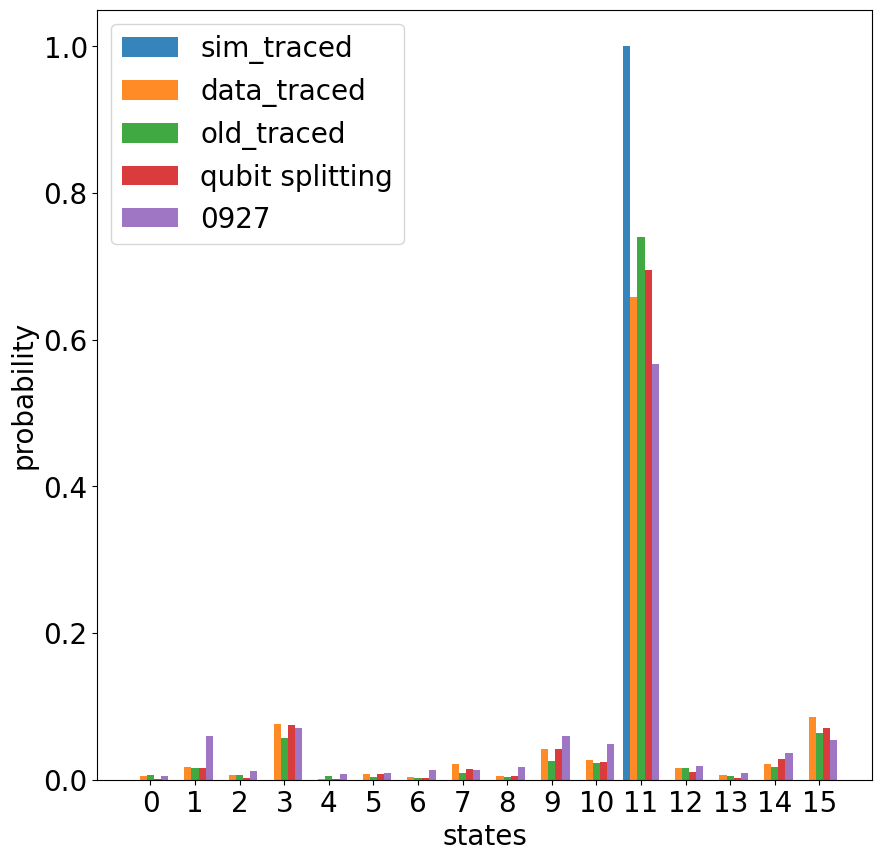

2024-09-19-133455_Line_005.txt
2024-03-05-174311_Line_005.txt
HAD4:RX+21:HAD5:RX+11:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:AZ4+1.0000:FTXA450.2500+:RY+41:AZ5+1.0000:FTXA450.2500+:RX+41:RY+42:FTXA420.2500+:RY-42:RX-22:AZ4-0.5000:RY+52:FTXA510.2500+:RY-52:RX-12:AZ5-0.5000:HAD4:HAD5



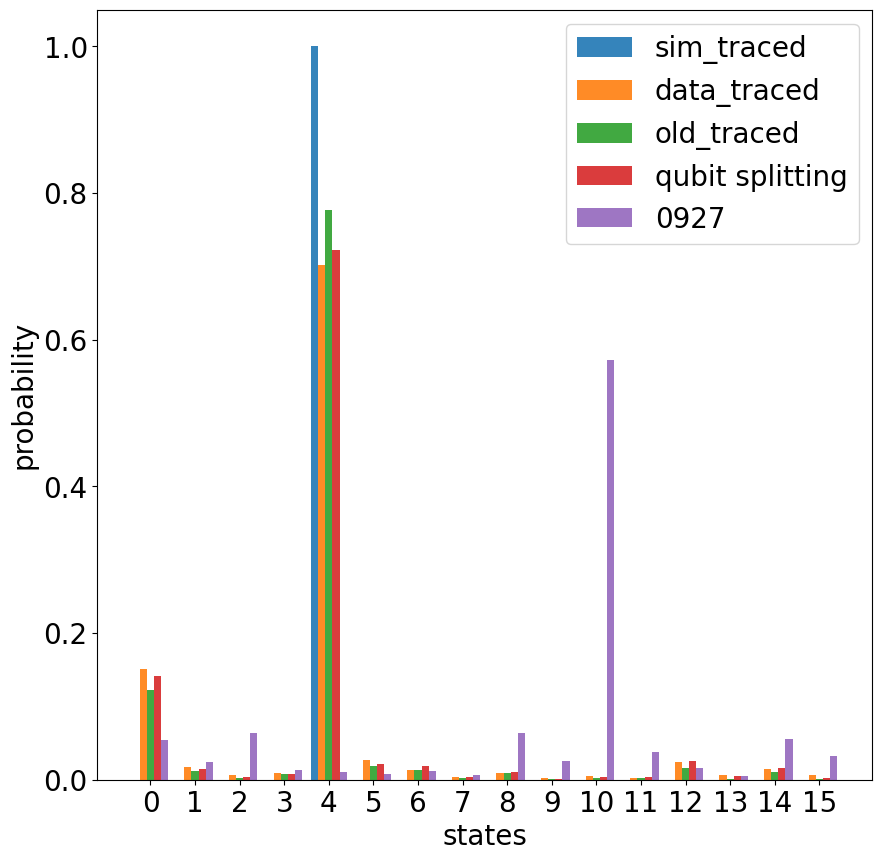

In [13]:
filenames_data=[]
counts_d2=[]
counts_d2_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d2.copy()

# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d2
circuit=c_d2
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    # counts=[round(shots*x) for x in  data_traced.population]
    # counts=[round(shots*x) for x in  data_traced.population]
    # print ("counts:", counts)
    # counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    # counts_d8.append(counts_ibm_mapping_dic)
    
    a_s.Import(paf_data_d2_old+filenames_d2_old[i],keep_file=True)
    print(filenames_d2_old[i])
    old_traced=Trace_Out(a_s,[0,1,2,3])

    b.Import(paf_data_d2_qubitsplitting+filenames_d2_qubitsplitting[i],keep_file=True)
    # print(filenames_d8_global_alignment[i])
    global_traced=Trace_Out(b,[0,1,2,3])

    # c.Import(paf_data_d8_global_alignment2+filenames_d8_global_alignment2[i],keep_file=True)
    # print(filenames_d8_global_alignment2[i])
    # global_traced_2=Trace_Out(c,[0,1,2,3])
    d.Import(paf_data_d2_0927+filenames_d2_0927[i],keep_file=True)
    # print(filenames_d8_global_alignment[i])
    d_traced=Trace_Out(d,[0,1,2,3])
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    # sim_traced=Trace_Out(b,[0,1,2,3])
    # counts_sim=[round(shots*x) for x in  sim_traced.population]
    # print ("counts sim:", counts_sim)

    Display_States_Population(states=[sim_traced,data_traced,old_traced,global_traced,d_traced],label=["sim_traced","data_traced","old_traced","qubit splitting","0927"])

In [13]:
filenames_data=[]
counts_d16=[]
counts_d16_spam=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d16.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d16
circuit=c_d16
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    print ("counts:", counts)
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d16.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

NameError: name 'filenames_d16' is not defined

In [12]:
filenames_data=[]
counts_d32=[]
counts=[]
counts_spam=[]
filenames_data=filenames_d32.copy()
# print (filenames_data)
# # print (len(filenames_data))
paf_data=paf_data_d32
circuit=c_d32
for i in range (len(filenames_data)):
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0,1,2,3])
    counts=[round(shots*x) for x in  data_traced.population]
    counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
    counts_d32.append(counts_ibm_mapping_dic)
    
    
    b_c.Interpret_GatesLab_Sequence(circuit[i])
    # print (circuit[i])
    b=b_c.Simulate()
    sim_traced=Trace_Out(b,[0,1,2,3])
    sim_traced=Trace_Out(b,[0,1,2,3])
    counts_sim=[round(shots*x) for x in  sim_traced.population]
    print ("counts sim:", counts_sim)
    # Display_States_Population(states=[sim_traced,data_traced],label=["sim_traced","data_traced"])

2024-09-16-182946_Line_001.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0]
2024-09-16-183208_Line_002.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0]
2024-09-16-183428_Line_003.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-183648_Line_004.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-183955_Line_005.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0]
2024-09-16-185029_Line_006.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-185256_Line_007.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0]
2024-09-16-185508_Line_008.txt
counts sim: [0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2024-09-16-185730_Line_009.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000]
2024-09-17-120431_Line_010.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0]
2024-09-17-120654_Line_011.txt
counts sim: [0, 0, 

In [13]:
import copy
from copy import copy, deepcopy

# copy.copy(x)
# copy.deepcopy(x)

# picklefile="c39b72eb-9de9-4338-b6ae-e478130a3f4fXX23541withpadding_set2"
with open("/Users/yzhu/yzhu_work/gates projects/EAB/circuits/0916 II ancilla err meas/033e3193-1437-4008-95e5-18cc59164f65II_ancilla_error_meas_expli_09162024", "rb") as fp:   # Unpickling
    eab_load = pickle.load(fp)
# print (picklefile)
# print (b)

# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/23541 EAB XX C=10 0424 /"+picklefile, "rb") as fp:   # Unpickling
#     eab_load_2 = pickle.load(fp)
# print (picklefile)

# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/circuits/23541 EAB XX C=10 0424 /"+picklefile, "rb") as fp:   # Unpickling
#     eab_load_3 = pickle.load(fp)
# print (picklefile)


C=20
eab_load_cpy=deepcopy(eab_load)
eab_load_cpy_spam=deepcopy(eab_load)
# eab_load_cpy_24=deepcopy(eab_load[0:20]) #a copy that only has depth=[2,4]


In [14]:
for i in range (C):
#     print (i)
    assert eab_load_cpy[i]["L"]==2
    eab_load_cpy[i]["counts"]=counts_d2[i].copy()


for i in range (2*C,3*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==8
    eab_load_cpy[i]["counts"]=counts_d8[i-2*C].copy()

for i in range (3*C,4*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==16
    eab_load_cpy[i]["counts"]=counts_d16[i-3*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])

for i in range (4*C,5*C):
#     print (i)
    assert eab_load_cpy[i]["L"]==32
    eab_load_cpy[i]["counts"]=counts_d32[i-4*C].copy()
#     print ( eab_load_cpy[i]["counts_exp"])
#     print (eab_load_cpy[i])


In [23]:
# print (eab_load_cpy)
# filename = str(uuid.uuid4())
# filename+="FTXX13_mapping1345_R_0516_00+11_ExperimentalData"
# with open("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0516 FTXX 13452/13452 explicit CNOT FT R/results/"+filename, "wb") as fp:
#     pickle.dump(eab_load_cpy, fp)


In [15]:
sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
import itertools
import pdb

'''Specify a set of Pauli you want to estimate'''
# C=10
C=20
nqubit=2
depth=[2,4,8,16,32]
pauli_request_list = [''.join(s) for s in itertools.product(['I','X','Y','Z'], repeat = nqubit)] #full

#process_EAB(Lrange, cb_data, pauli_request_list)
eab_result=EAB_process_modified.process_EAB(depth, eab_load_cpy, pauli_request_list)
# eab_result_spam=EAB_process_modified.process_EAB(depth, eab_load_cpy_spam, pauli_request_list)

for pauli in eab_resultL
    print (eab_result[pauli])


{'fidelity_list': {'II': {2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, 'IX': {2: [0.679, 0.713, 0.6, 0.734, 0.744, 0.726, 0.676, 0.765, 0.526, 0.632, 0.49, 0.485, 0.862, 0.742, 0.397, 0.511, 0.493, 0.838, 0.65, 0.845], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [0.441, 0.531, 0.68, 0.48, 0.665, 0.435, 0.796, 0.639, 0.642, 0.18, 0.555, 0.351, 0.749, 0.377, 0.201, 0.475, 0.488, 0.295, 0.38, 0.319], 16: [0.49, 0.08, 0.551, 0.325, 0.335, -0.003, 0.255,

In [31]:
print (eab_result["fidelity_list"])
for pauli in eab_result["fidelity_list"]:
    print (eab_result["fidelity_list"][pauli])
    


{'II': {2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 32: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}, 'IX': {2: [0.679, 0.713, 0.6, 0.734, 0.744, 0.726, 0.676, 0.765, 0.526, 0.632, 0.49, 0.485, 0.862, 0.742, 0.397, 0.511, 0.493, 0.838, 0.65, 0.845], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [0.441, 0.531, 0.68, 0.48, 0.665, 0.435, 0.796, 0.639, 0.642, 0.18, 0.555, 0.351, 0.749, 0.377, 0.201, 0.475, 0.488, 0.295, 0.38, 0.319], 16: [0.49, 0.08, 0.551, 0.325, 0.335, -0.003, 0.255, 0.377, 0.579, 0.0

In [39]:
from scipy.optimize import curve_fit
def rcs_fit_fun_depth1(x, alpha):
        #return a * np.exp(-alpha * x)
        return alpha ** x

def fit_EAB_depth1(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun_depth1, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1])
        alpha = params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[0]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0


    return alpha, alpha_err

    print(alpha, alpha_err)

In [32]:
raw_fidelity_list = eab_result["fidelity_list"]

#######depth=[2]#########
##########################
plot_dic={}
error_dic={}
err=[]
# sys.exit(0)
depth=[2,8,16,32]
fidelity_list = {}
stdev_list = {}

for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha, alpha_err = fit_EAB_depth1(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha
        stdev_list[pauli_label] = alpha_err

# print(fidelity_list)

# print(stdev_list)

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
shots=2000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], 1-fidelity_list[pauli_label], stdev_list[pauli_label])
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
    plot_dic[pauli_label[::-1]]=1-fidelity_list[pauli_label]
    error_dic[pauli_label[::-1]]=stdev_list[pauli_label]
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))

np.save("II_fidelity.npy", fidelity_list)


Parameters: n = 2, C = 20,  L =  [2, 8, 16, 32]
Measurement based simulation, shots = 2000
No readout error
Total error =  0.09646808600171342
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.08604688677077577 0.0054109611259032285
YI 0.09382589416549258 0.005948201237880141
ZI 0.0061364078341812345 0.00016355892466388122
IX 0.06708124286720019 0.00371430685906252
XX 0.18933445336769816 0.011280480351532307
YX 0.20943751762469187 0.012388179640639388
ZX 0.075025820200603 0.0040201618955826345
IY 0.06984852976935241 0.00399411780570762
XY 0.21520513599675084 0.012515727253441248
YY 0.2327461653821099 0.013131252774780123
ZY 0.07923031833015937 0.004415225598875199
IZ 0.005311415339011916 9.97934055476377e-05
XZ 0.09672590258852531 0.005735408034049993
YZ 0.10659695250344792 0.006405365523414451
ZZ 0.010936733287414957 0.00018620583351247591


In [17]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.9035319
XI 0.0052739
YI -0.0016379
ZI 0.0572718
IX 0.0056071
XX -2.85e-05
YX -8.73e-05
ZX -0.0034716
IY -0.0014118
XY -0.0001691
YY 0.0004126
ZY 0.0018043
IZ 0.0457706
XZ -0.0015974
YZ 0.0009018
ZZ -0.0121704


In [41]:
def rcs_fit_fun(x, a, alpha):
        #return a * np.exp(-alpha * x)
        return a * (alpha ** x)

def fit_EAB_plot(X, xeb_list):
    Y = [np.mean(xeb_list[L]) for L in X]
    Yerr = [sem(xeb_list[L]) for L in X]
    #print(linregress(X,np.log(Y)))
    
    
    try:
        params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
        alpha = params[1]
        a=params[0]
        params_err = np.sqrt(np.diag(pcov))
        alpha_err = params_err[1]

    except RuntimeError:
        alpha = 1.0
        alpha_err = 0.0

    # params, pcov = curve_fit(rcs_fit_fun, X, Y, sigma=Yerr, absolute_sigma=True, p0=[1,1])
    # #params, pcov = curve_fit(rcs_fit_fun, X, Y, absolute_sigma=True, p0=[1,1])


    # print(params)

    return alpha,a, alpha_err,Y, Yerr

    print(alpha, alpha_err)




Parameters: n = 2, C = 20,  L =  [2, 4, 8]
Measurement based simulation, shots = 4000
No readout error
Total error =  0.0707675026853678
Label / Pauli infidelity / Standard deviation
II 0.0 0.0
XI 0.0766527 0.0048889
YI 0.0823781 0.0053268
ZI 0.0185302 0.0018453
IX 0.0672387 0.0067798
XX 0.1234451 0.0091569
YX 0.1110884 0.0087205
ZX 0.0698884 0.0076421
IY 0.0701012 0.007461
XY 0.11667 0.008234
YY 0.1211933 0.0092006
ZY 0.0718296 0.0074968
IZ 0.0224242 0.00219
XZ 0.0864997 0.0052374
YZ 0.0826181 0.0051542
ZZ 0.0117224 0.002029
{'IX': [0.7658291518016773, 0.7049379535608553, 0.44539448956126987], 'IY': [0.7287804484734356, 0.6642322190300941, 0.41842458620644585], 'IZ': [0.9054033791562718, 0.8638434962337278, 0.8120019783296069], 'XI': [0.8140829280181485, 0.7469946066621691, 0.5297084286190569], 'XX': [0.6355105103074588, 0.5439876420683725, 0.2731182752300333], 'XY': [0.6177106340792053, 0.5437321355506601, 0.28889292470592676], 'XZ': [0.7569346110808233, 0.6894904837220774, 0.4811415

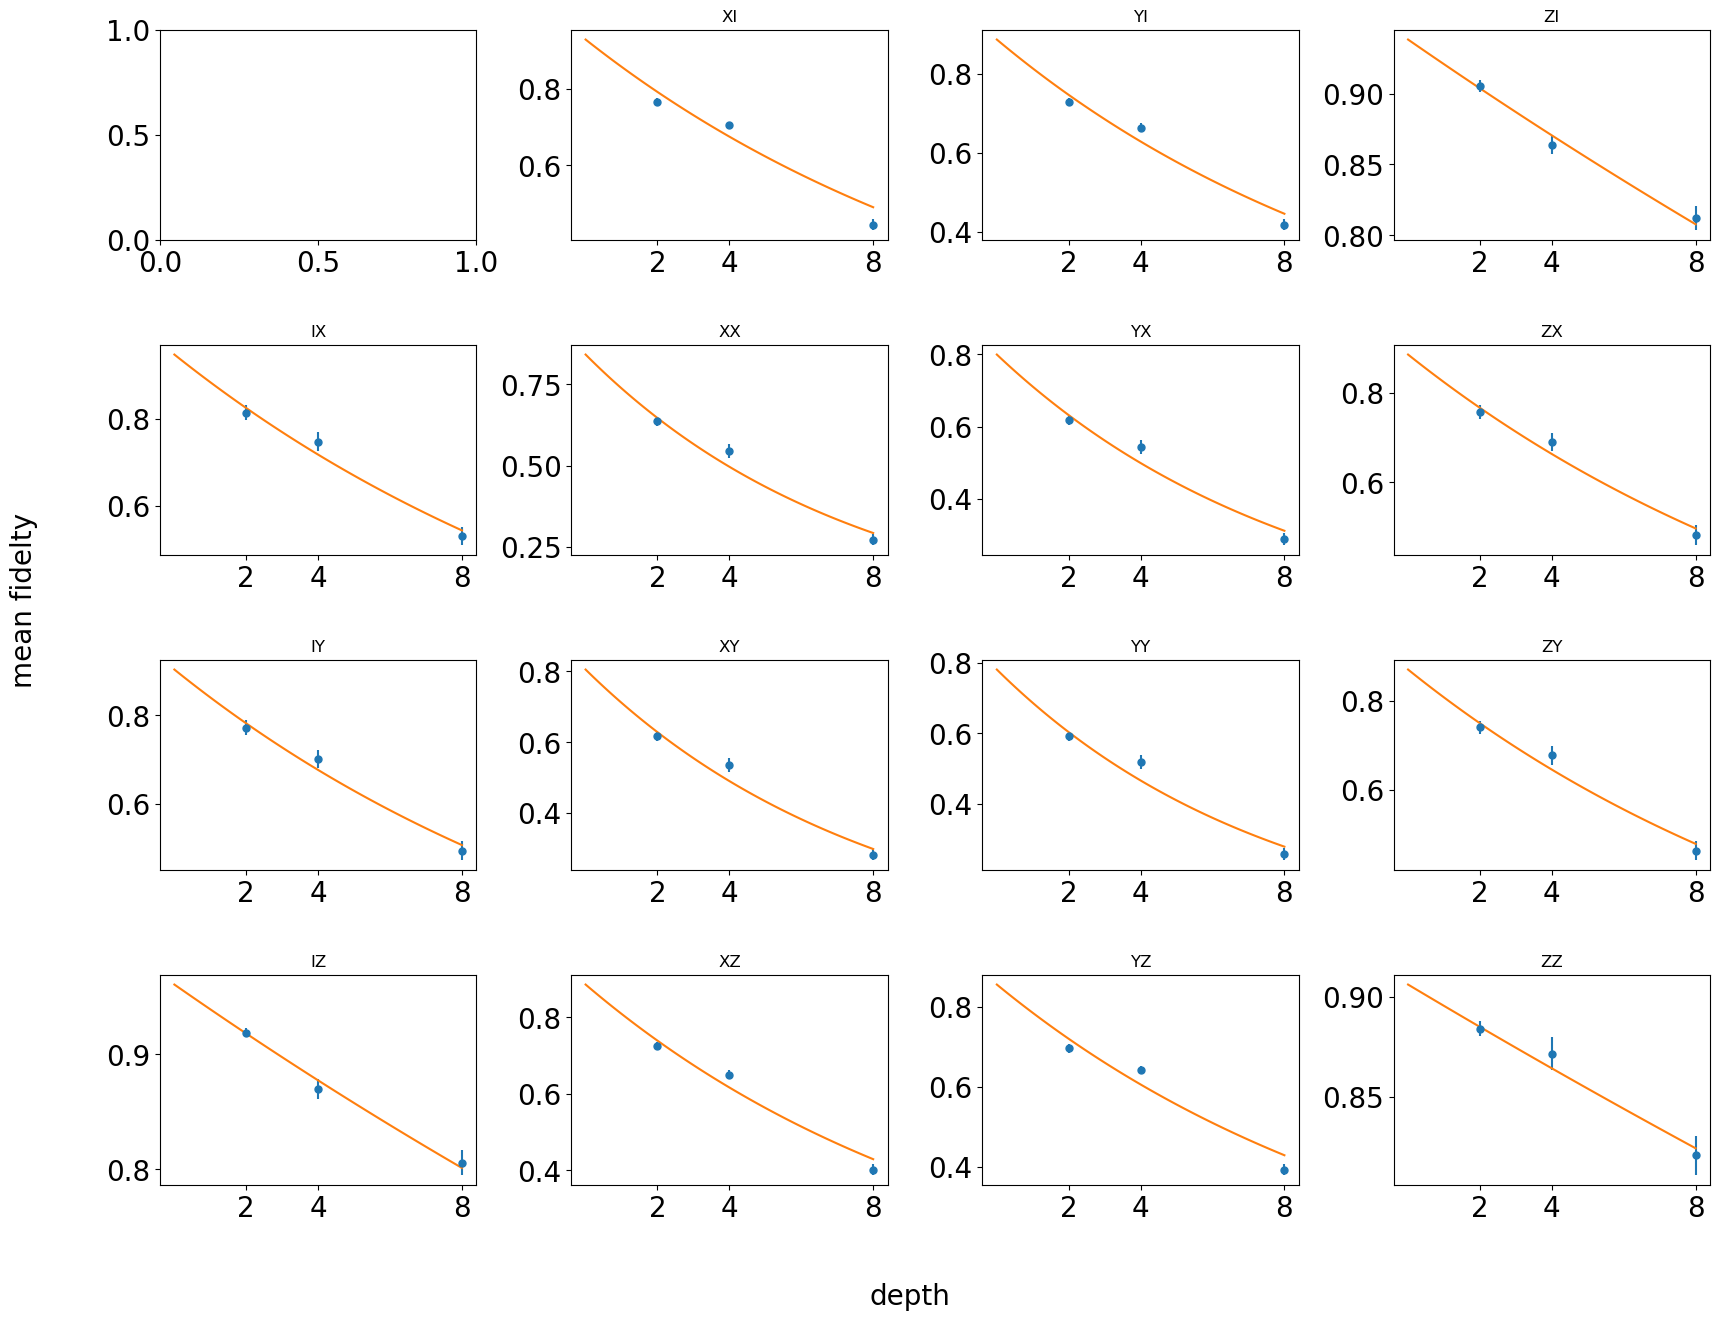

In [42]:
raw_fidelity_list = eab_result["fidelity_list"]
plot_dic={}
error_dic={}
# sys.exit(0)
depth=[2,4,8]
fidelity_list = {}
stdev_list = {}
a248_dic={}
Y248_dic={}
Yerr248_dic={}
for pauli_label in pauli_request_list:
    if(pauli_label == 'I'*nqubit):
        fidelity_list[pauli_label] = 1.0
        stdev_list[pauli_label] = 0.0
    else:
        alpha,a, alpha_err,Y, Yerr = fit_EAB_plot(depth, raw_fidelity_list[pauli_label])
        fidelity_list[pauli_label] = alpha #pauli fidelity from fit
        stdev_list[pauli_label] = alpha_err #error on pauli fidelity from fit
        a248_dic[pauli_label]=a 
        Y248_dic[pauli_label]=Y
        Yerr248_dic[pauli_label]=Yerr

print("Parameters: n = %d, C = %d, " % (nqubit,C), "L = ", str(depth))
use_density_matrix=False
use_readout_error =False
shots=4000
if use_density_matrix:
    print("Density matrix based simulation")
else:
    print("Measurement based simulation, shots = %d" % shots)

if use_readout_error is True:
    print("Measurement bitflip rate = %f" % eps_readout)
else:
    print("No readout error")

# Average fidelity
print("Total error = ", 1-np.mean(list(fidelity_list.values())))

print("Label / Pauli infidelity / Standard deviation")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(1-fidelity_list[pauli_label],7), round(stdev_list[pauli_label],7))
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
    plot_dic[pauli_label[::-1]]=round(1-fidelity_list[pauli_label],7)
    error_dic[pauli_label[::-1]]=round (stdev_list[pauli_label],7)
# print('Effective noise rate = ' + str(1-np.average(list(fidelity_list.values()))))
# for pauli_label in pauli_request_list:
#     print(pauli_label[::-1], fidelity_list[pauli_label])

plot_248={}
plot_248=deepcopy(plot_dic)
err_248=deepcopy(error_dic)
print (Y248_dic)

x_c=np.linspace(0,8,num=80)
nqubit=2
fig, axs = plt.subplots(4, 4)
fig.set_figwidth(20)
fig.set_figheight(15)
fig.subplots_adjust(hspace=0.5,wspace=0.3) 
fig.text(0.5, 0.03, 'depth', ha='center',fontsize=20)
fig.text(0.05, 0.5, 'mean fidelty', va='center', rotation='vertical',fontsize=20)
for i in range (4):
    for j in range(4):
        pauli_label=pauli_request_list[4*i+j]
        if (pauli_label == 'I'*nqubit):
#                 fidelity_list[pauli_label] = 1.0
#                 stdev_list[pauli_label] = 0.0
            pass
        else:
            axs[i, j].set_xticks([2,4,8])   
            axs[i, j].errorbar(depth,Y248_dic[pauli_label], yerr=Yerr248_dic[pauli_label], fmt='o',markersize=5)
            axs[i, j].plot(x_c,rcs_fit_fun(x_c,a248_dic[pauli_label], fidelity_list[pauli_label]))
            axs[i, j].set_title(pauli_label[::-1])
                
# for pauli_label in pauli_request_list:
# fig.savefig("fit.pdf", format="pdf", dpi=500)        

In [43]:
error_list = fidelity_to_error(fidelity_list,nqubit)
print("Label / Pauli error rates")
for pauli_label in pauli_request_list:
    print(pauli_label[::-1], round(error_list[pauli_label],7))


Label / Pauli error rates
II 0.9292325
XI 0.0003886
YI 0.0011372
ZI 0.0293007
IX 0.0021148
XX 0.00143
YX 0.0023392
ZX 0.0004377
IY 0.0010981
XY 0.0034248
YY 0.000114
ZY 0.0002535
IZ 0.0231643
XZ 0.0008205
YZ -0.0003892
ZZ 0.0051333


2024-09-16-165805_Line_001.txt
counts sim: [0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


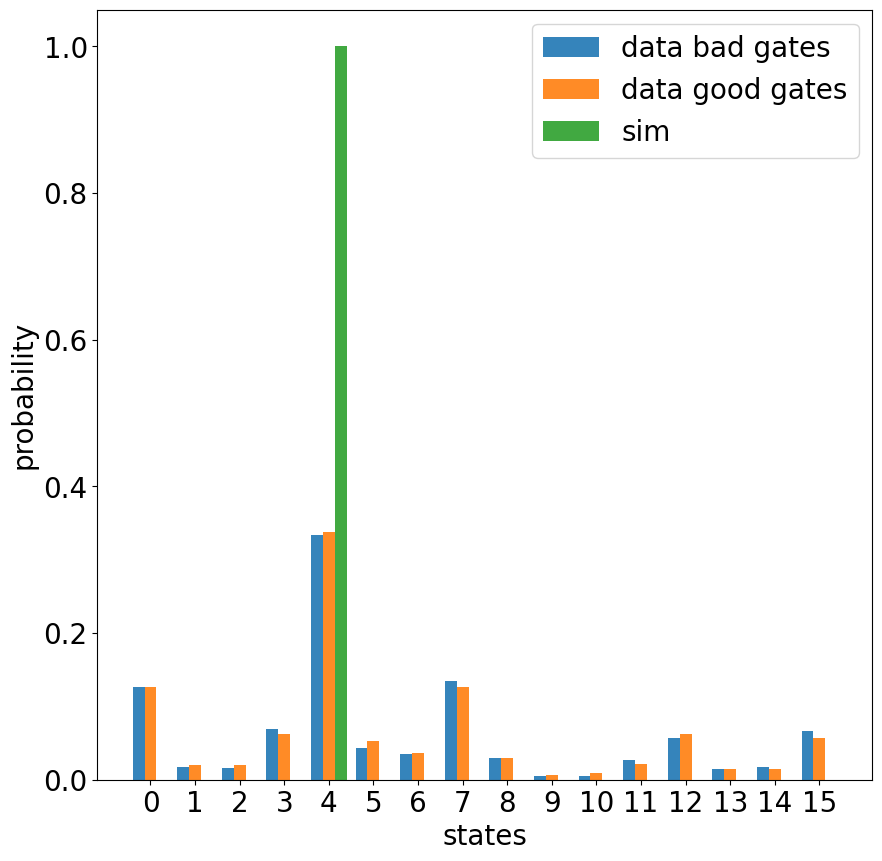

2024-09-16-165917_Line_002.txt
counts sim: [0, 0, 0, 0, 0, 0, 0, 0, 0, 2000, 0, 0, 0, 0, 0, 0]


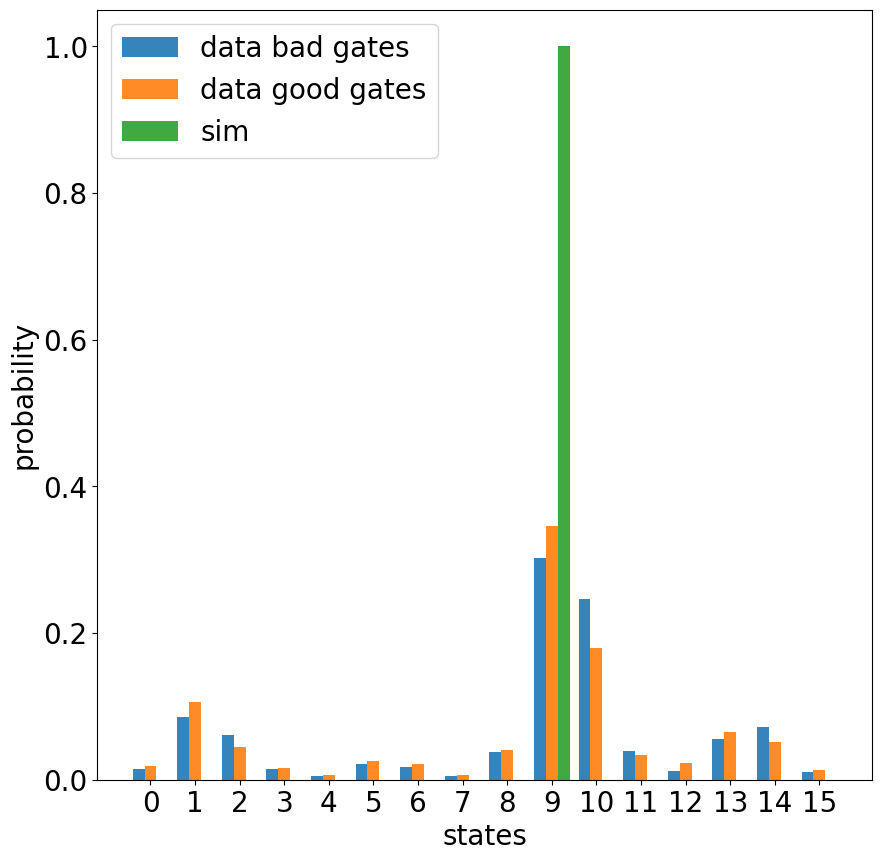

2024-09-16-170026_Line_003.txt
counts sim: [0, 0, 0, 2000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


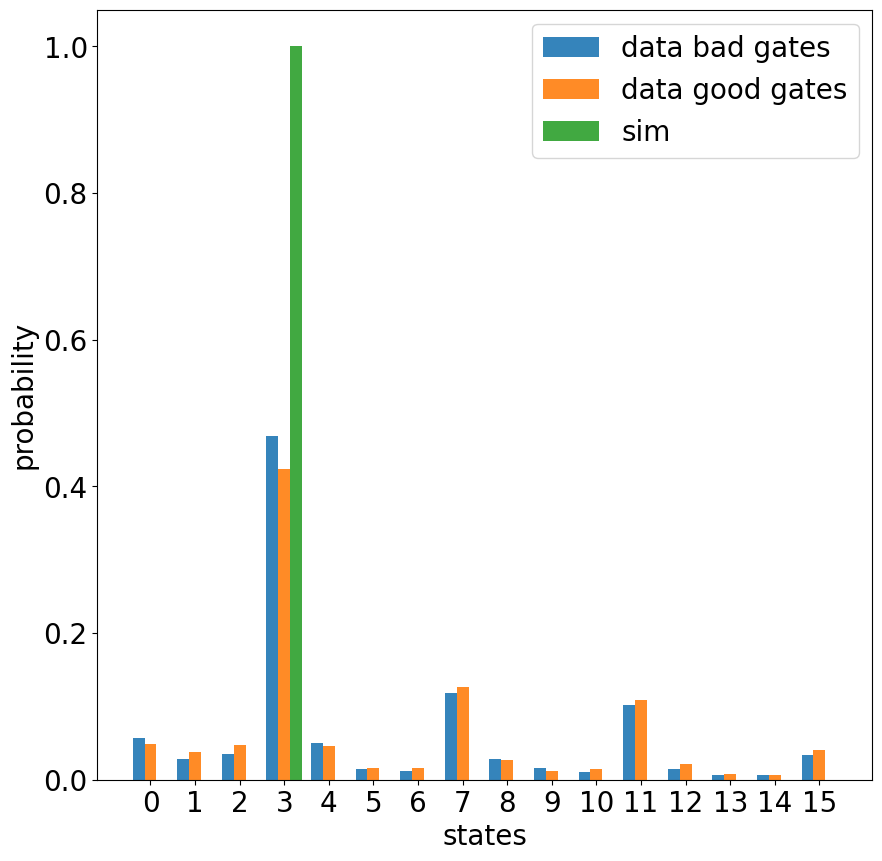

In [16]:
# filenames_data=filenames_d16_goodgates
# shots=2000
# for i in range (len(filenames_data)):
#     print (filenames_data[i])
#     a.Import("/Volumes/funkflower/Labs/Gates/Data/2024/202409/20240916/2024-09-16 BT__d=16/good gates/"+filenames_data[i],keep_file=True)
#     data_traced=Trace_Out(a,[0,1,2,3])
#     # counts=[round(shots*x) for x in  data_traced.population]
#     # print ("counts:", counts)
#     # counts_ibm_mapping, counts_ibm_mapping_dic=map_statepop_2_ibm_mapping(counts,nqubit)
#     # # print ("counts_ibm_mapping_dic:",counts_ibm_mapping_dic)
#     # counts_d2.append(counts_ibm_mapping_dic)
    
#     a_s.Import(paf_data_d16+filenames_d16[i],keep_file=True)
#     data_traced_spam=Trace_Out(a_s,[0,1,2,3])
#     # counts_spam=[round(shots*x) for x in  data_traced_spam.population]
#     # counts_ibm_mapping_spam, counts_ibm_mapping_dic_spam=map_statepop_2_ibm_mapping(counts_spam,nqubit)
#     # counts_d2_spam.append(counts_ibm_mapping_dic_spam)

#     b_c.Interpret_GatesLab_Sequence(c_d16[i])
#     # print (circuit[i])
#     b=b_c.Simulate()
#     sim_traced=Trace_Out(b,[0,1,2,3])
#     counts_sim=[round(shots*x) for x in  sim_traced.population]
#     print ("counts sim:", counts_sim)
#     Display_States_Population(states=[data_traced,data_traced_spam,sim_traced],label=["data bad gates","data good gates","sim"])

spam results